In [2]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [19]:
import requests
import pandas as pd
pd.set_option('display.max_columns', None) 
import pycountry
import time
import pylab as plt
import seaborn as sns
import re
import pylab as plt

In [13]:
def buscador(lugar):
    latitud = None
    longitud = None
    try:
        url = "https://nominatim.openstreetmap.org/search"
        params = {'q':lugar ,"format": "json"}
        respuesta = requests.get(url,params,timeout=5)
        
        datos= respuesta.json()
        latitud = datos[0]['lat']
        longitud = datos[0]['lon']
        
    except:
        pass
    return  latitud,longitud 

In [5]:
buscador('Yalung')

('27.8536839', '86.4114542')

In [5]:
 url = "https://nominatim.openstreetmap.org/search"
params = {'q':'everest' ,"format": "json"}
respuesta = requests.get(url,params,timeout=5)

datos= respuesta.json()


In [6]:
expeditions = pd.read_csv('data/expeditions.csv')
#expeditions.head()

In [37]:
members = pd.read_csv('data/members.csv')

In [38]:
members.tail()

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,hired,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
76514,PUTH19101,PUTH19101-07,PUTH,Putha Hiunchuli,2019,Spring,M,44.0,Nepal,H-A Worker,True,6350.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76515,RATC19101,RATC19101-01,RATC,Ratna Chuli,2019,Spring,M,55.0,Romania,Leader,False,6600.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76516,SANK19101,SANK19101-01,SANK,Sano Kailash,2019,Spring,M,56.0,Austria,Leader,False,6452.0,True,False,False,False,NaN,NaN,False,NaN,NaN
76517,SANK19101,SANK19101-02,SANK,Sano Kailash,2019,Spring,F,57.0,Austria,Climber,False,5700.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76518,SANK19101,SANK19101-03,SANK,Sano Kailash,2019,Spring,M,41.0,Nepal,H-A Worker,True,6452.0,True,False,False,False,NaN,NaN,False,NaN,NaN


In [39]:
peaks = pd.read_csv('data/peaks.csv')

In [40]:
peaks.head()

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101


In [41]:
lista_picos = peaks['peak_name'].unique()
len(lista_picos)

468

In [42]:
peaks.describe()

,height_metres,first_ascent_year
count,468.000000,336.000000
mean,6656.636752,1979.077381
std,571.912791,100.205460
min,5407.000000,201.000000
25%,6235.750000,1963.000000
50%,6559.500000,1982.000000
75%,6911.000000,2008.000000
max,8850.000000,2019.000000


In [43]:
#Miramos nulos y Nan
nan_cols = peaks.isna().sum()

nan_cols[nan_cols>0]

peak_alternative_name         223
first_ascent_year             132
first_ascent_country          132
first_ascent_expedition_id    135
dtype: int64

In [44]:
#definimos una función para comprobar rapidamente el grafico
def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = df.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

'N nan cols: 4'

peak_alternative_name         47.649573
first_ascent_year             28.205128
first_ascent_country          28.205128
first_ascent_expedition_id    28.846154
dtype: float64

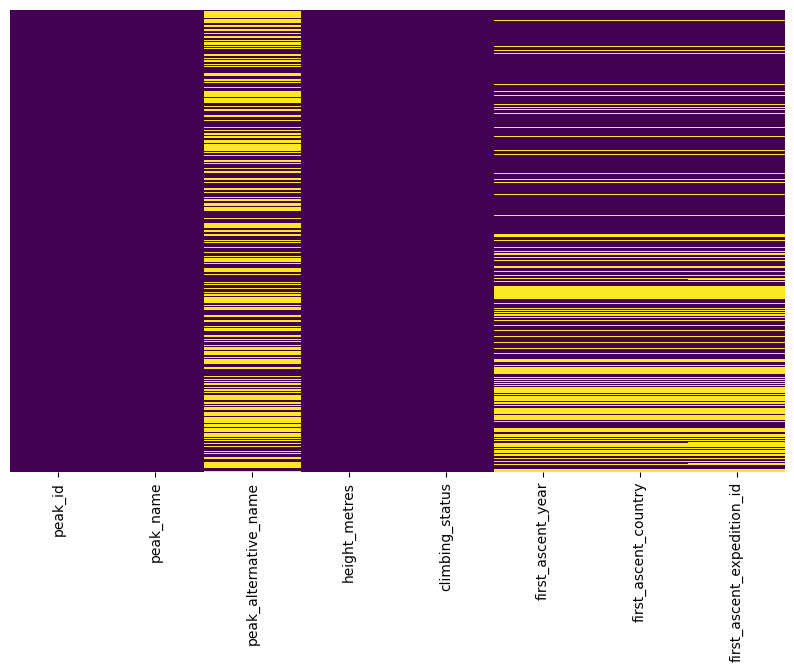

In [21]:
check_nan(peaks)

In [45]:
peaks=peaks.drop('peak_alternative_name',axis=1)

In [55]:
peaks.drop('first_ascent_year', axis= 1)


0      1961.0
1      1953.0
2      1950.0
3      1960.0
4      1961.0
        ...  
463    2019.0
464    1981.0
465       NaN
466       NaN
467       NaN
Name: first_ascent_year, Length: 468, dtype: float64

In [56]:
peaks.first_ascent_country.dropna(inplace=True)
peaks.first_ascent_expedition_id.dropna(inplace=True)

'N nan cols: 3'

first_ascent_year             28.205128
first_ascent_country          28.205128
first_ascent_expedition_id    28.846154
dtype: float64

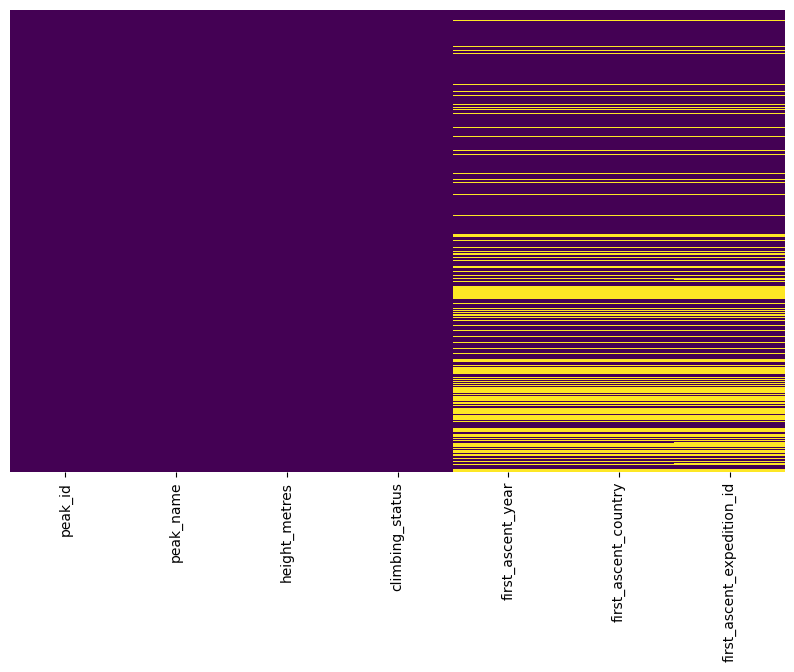

In [57]:
check_nan(peaks)

In [31]:
peaks.first_ascent_year.isna().any()

True

In [51]:
peaks.isna().any()

peak_id                       False
peak_name                     False
height_metres                 False
climbing_status               False
first_ascent_year              True
first_ascent_country           True
first_ascent_expedition_id     True
dtype: bool

In [11]:
ochomiles= peaks[peaks['height_metres'] >= 8000 ]


In [14]:
#peaks.lat = peaks.peak_name.apply(lambda x: buscador(x))
lista =[]
for e in lista_picos:
    
    lista.append(buscador(e))
lista    

[('27.8621001', '86.8604289'),
 ('27.8812212', '86.8687897'),
 ('28.5962553', '83.8270789'),
 ('28.5349707', '84.1218222'),
 ('28.5853509', '83.9891091'),
 ('28.5368932', '84.0835623'),
 ('-33.0000006', '27.8761869'),
 ('28.5110773', '83.6615219'),
 ('28.5183959', '83.8063433'),
 ('50.4653763', '4.1953511'),
 ('7.7698', '8.1578'),
 ('27.8720615', '86.9796489'),
 ('27.7203406', '85.3611116'),
 ('28.2721381', '85.6635329'),
 ('27.692718', '82.95547918805183'),
 ('10.4330167', '21.27055'),
 ('27.7772801', '86.98151'),
 (None, None),
 ('35.4623305', '-80.6827327'),
 (None, None),
 ('28.0967613', '86.659654'),
 (None, None),
 ('27.9029624', '86.7687987'),
 ('27.9194539', '86.9819868'),
 ('-12.8241485', '33.3069523'),
 (None, None),
 (None, None),
 ('28.7454053', '84.0228323'),
 (None, None),
 ('28.024329', '86.9151856'),
 ('30.3467133', '78.1783676'),
 ('28.7631589', '83.3873786'),
 ('28.7540263', '83.3771445'),
 ('28.7357489', '83.314379'),
 ('28.734057', '83.3605794'),
 ('28.7083897', '83

In [15]:
latitudes=lista

In [ ]:
longitudes =[]
for e in lista_picos:
    
    longitudes.append(buscador(e))
longitudes   

In [ ]:
coor =[]
for e in lista_picos:
    
    coor.append(buscador(e))
coor 

In [ ]:
peaks['coord'] = pd.Series(coor)

In [ ]:
peaks.shape

In [ ]:
coor= peaks[peaks['coor'] >= 8000 ]

In [ ]:
peaks['first_ascent_country'] = peaks['first_ascent_country'].str.split(',').str[0]

In [ ]:
peaks['first_ascent_country']

In [3]:
# create a dictionary to map country names to ISO country codes
country_codes = {}
for country in pycountry.countries:
    country_codes[country.name] = country.alpha_2

# use the map function to create a new column with ISO country codes
peaks['country_code'] = peaks['first_ascent_country'].map(country_codes)

peaks.head(10)

NameError: name 'peaks' is not defined

In [ ]:
url = f"https://api/v3/country/getspecies/:jp?token=da68fe0d561ec2f9932e85de7c3c8cecab5c57db09c6f9c6bebbd6a2a532e2bd"
        #time.sleep(15)
respuesta = requests.get(url)
        
datos= respuesta.json()

In [ ]:
def buscador2(lugar):
    datos = None
    try:
        url = f"https://api/v3/country/getspecies/:{lugar}?token=da68fe0d561ec2f9932e85de7c3c8cecab5c57db09c6f9c6bebbd6a2a532e2bd"
        time.sleep(15)
        respuesta = requests.get(url)
        
        datos= respuesta.json()
        
        
    except:
        pass
    return  datos

In [ ]:
buscador2('JP')